In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [7]:
# Load the MNIST dataset
train_batch_size = 100
test_batch_size = 64
transform = transform=transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor(),transforms.Normalize((0.1309,), (0.3083,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=train_batch_size, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=test_batch_size, shuffle=False)

In [25]:
# Define three different CNN models
class CNN_Model1(nn.Module):
    def __init__(self):
        super(CNN_Model1, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(20*5*5, 120)
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        x = torch.relu(torch.max_pool2d(self.conv1(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv2(x), 2))
        x = x.view(x.size()[0],-1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)

class CNN_Model2(nn.Module):
    def __init__(self):
        super(CNN_Model2, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(2048, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(torch.max_pool2d(self.conv1(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv2(x), 2))
        x = x.view(x.size()[0], -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)
    
class CNN_Model3(nn.Module):
    def __init__(self):
        super(CNN_Model3, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(1024, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.relu(torch.max_pool2d(self.conv1(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv2(x), 2))
        x = x.view(x.size()[0], -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)

In [26]:
# Initialize models, loss function, and optimizers
model1 = CNN_Model1()
model2 = CNN_Model2()
model3 = CNN_Model3()
criterion = nn.CrossEntropyLoss()
optimizer1 = optim.Adam(model1.parameters(), lr=0.001)
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)
optimizer3 = optim.Adam(model3.parameters(), lr=0.001)

In [32]:
def train_model(model, optimizer):
    model.train()
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []
    epochs = 10
    for epoch in range(epochs):  # Loop over the dataset multiple times
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
        
        model.eval()
        test_loss = 0
        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for data, target in testloader:
                outputs = model(data)
                test_loss += criterion(outputs, target).item()
                _, predicted = torch.max(outputs.data, 1)
                total_test += target.size(0)
                correct_test += (predicted == target).sum().item()
        
        print(f'Epoch {epoch+1}, Train Loss: {running_loss/len(trainloader):.4f}, Test Loss: {test_loss/len(testloader):.4f}')
        test_loss = (test_loss / len(testloader))
        test_accuracy = 100 * correct_test / total_test
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)
        
        train_loss = (running_loss / len(trainloader))
        train_accuracy = 100 * correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
    
    return train_losses, test_losses, train_accuracies, test_accuracies

train_losses1, test_losses1, train_accuracies1, test_accuracies1 = train_model(model1, optimizer1)
train_losses2, test_losses2, train_accuracies2, test_accuracies2 = train_model(model2, optimizer2)
train_losses3, test_losses3, train_accuracies3, test_accuracies3 = train_model(model3, optimizer3)

Epoch 1, Train Loss: 0.0083, Test Loss: 0.0538
Epoch 2, Train Loss: 0.0045, Test Loss: 0.0462
Epoch 3, Train Loss: 0.0036, Test Loss: 0.0471
Epoch 4, Train Loss: 0.0041, Test Loss: 0.0505
Epoch 5, Train Loss: 0.0033, Test Loss: 0.0434
Epoch 6, Train Loss: 0.0030, Test Loss: 0.0516
Epoch 7, Train Loss: 0.0037, Test Loss: 0.0596
Epoch 8, Train Loss: 0.0056, Test Loss: 0.0615
Epoch 9, Train Loss: 0.0038, Test Loss: 0.0541
Epoch 10, Train Loss: 0.0027, Test Loss: 0.0575
Epoch 1, Train Loss: 0.2154, Test Loss: 0.0616
Epoch 2, Train Loss: 0.0565, Test Loss: 0.0410
Epoch 3, Train Loss: 0.0404, Test Loss: 0.0416
Epoch 4, Train Loss: 0.0318, Test Loss: 0.0378
Epoch 5, Train Loss: 0.0241, Test Loss: 0.0380
Epoch 6, Train Loss: 0.0188, Test Loss: 0.0327
Epoch 7, Train Loss: 0.0163, Test Loss: 0.0352
Epoch 8, Train Loss: 0.0134, Test Loss: 0.0287
Epoch 9, Train Loss: 0.0120, Test Loss: 0.0362
Epoch 10, Train Loss: 0.0101, Test Loss: 0.0362
Epoch 1, Train Loss: 0.0129, Test Loss: 0.0458
Epoch 2, Tr

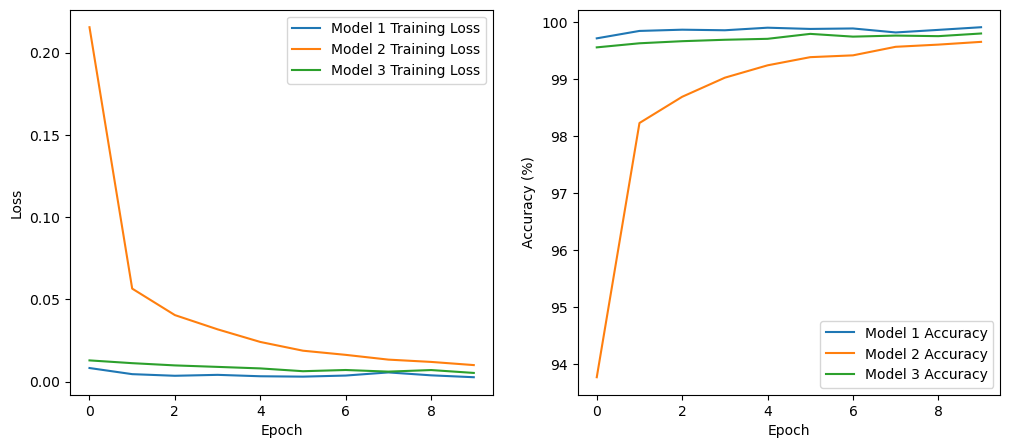

In [33]:
# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses1, label='Model 1 Training Loss')
plt.plot(train_losses2, label='Model 2 Training Loss')
plt.plot(train_losses3, label='Model 3 Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies1, label='Model 1 Accuracy')
plt.plot(train_accuracies2, label='Model 2 Accuracy')
plt.plot(train_accuracies3, label='Model 3 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()
